In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import random
import os
import seaborn as sn
import numpy as np
import glob

In [2]:
Activities={
1: 'walking',	
2: 'running',	
3: 'shuffling',
4: 'stairs (ascending)',	
5: 'stairs (descending)',
6: 'standing',	
7: 'sitting',	
8: 'lying',	
13: 'cycling (sit)',	
14: 'cycling (stand)',	
130: 'cycling (sit, inactive)',
140: 'cycling (stand, inactive)'
}
colors = ['r', 'OrangeRed',  'y','Chartreuse', 'g', 'SpringGreen','c', 'DarkCyan', 'b', 'DarkMagenta','m', 'DarkRed']
all_sizes = np.zeros(len(Activities))

Text(0.5, 0.98, 'figure S015.csv')

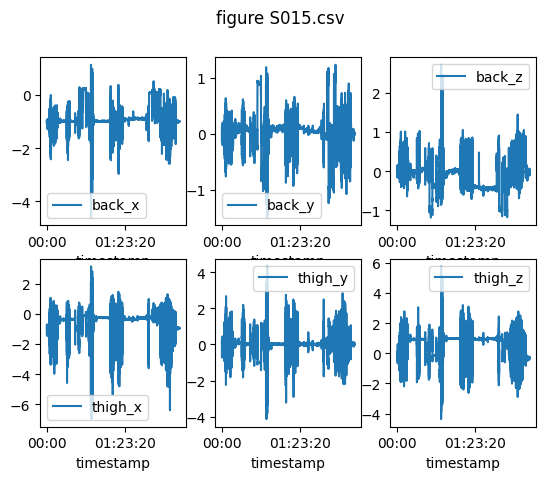

In [3]:
data_dir = './harth'
random_file = random.choice(os.listdir(data_dir))
file_path = os.path.join(data_dir, random_file)
with open(file_path,'r') as csvfile: 
    df = pd.read_csv(csvfile)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.time
fig, axes = plt.subplots(nrows = 2, ncols = 3)

sub1 = df.plot(ax = axes[0][0],x = 'timestamp', y = 'back_x')
df.plot(ax = axes[0][1],x = 'timestamp', y = 'back_y')
df.plot(ax = axes[0][2],x = 'timestamp', y = 'back_z')
df.plot(ax = axes[1][0],x = 'timestamp', y = 'thigh_x')
df.plot(ax = axes[1][1],x = 'timestamp', y = 'thigh_y')
df.plot(ax = axes[1][2],x = 'timestamp', y = 'thigh_z')

plt.suptitle('figure ' + random_file)

standard deviation:
back_x: 0.4162
back_y: 0.2813
back_z: 0.3379
thigh_x: 0.4613
thigh_y: 0.3353
thigh_z: 0.6137

mean:
back_x: -0.8008
back_y: 0.0471
back_z: -0.1363
thigh_x: -0.5429
thigh_y: 0.0219
thigh_z: 0.4398

median:
back_x: -0.9745
back_y: 0.0528
back_z: -0.0121
thigh_x: -0.3545
thigh_y: 0.0224
thigh_z: 0.9163



Text(0.5, 0.98, 'figure S015.csv')

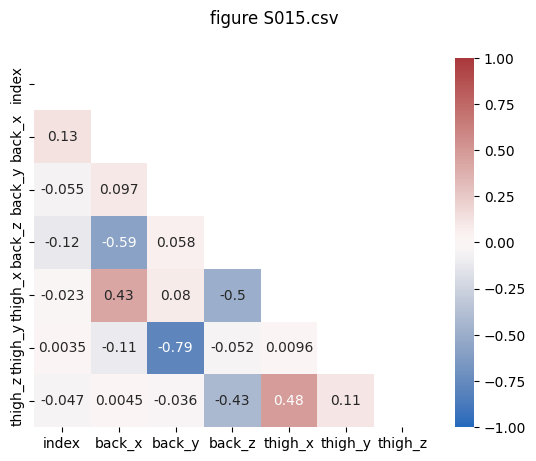

In [4]:
std_back_x = np.std(df['back_x'])
std_back_y = np.std(df['back_y'])
std_back_z = np.std(df['back_z'])
std_thigh_x = np.std(df['thigh_x'])
std_thigh_y = np.std(df['thigh_y'])
std_thigh_z = np.std(df['thigh_z'])

mean_back_x = np.mean(df['back_x'])
mean_back_y = np.mean(df['back_y'])
mean_back_z = np.mean(df['back_z'])
mean_thigh_x = np.mean(df['thigh_x'])
mean_thigh_y = np.mean(df['thigh_y'])
mean_thigh_z = np.mean(df['thigh_z'])

median_back_x = np.median(df['back_x'])
median_back_y = np.median(df['back_y'])
median_back_z = np.median(df['back_z'])
median_thigh_x = np.median(df['thigh_x'])
median_thigh_y = np.median(df['thigh_y'])
median_thigh_z = np.median(df['thigh_z'])

print("standard deviation:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(std_back_x),float(std_back_y),float(std_back_z),float(std_thigh_x),float(std_thigh_y),float(std_thigh_z)))

print("mean:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(mean_back_x),float(mean_back_y),float(mean_back_z),float(mean_thigh_x),float(mean_thigh_y),float(mean_thigh_z)))

print("median:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(median_back_x),float(median_back_y),float(median_back_z),float(median_thigh_x),float(median_thigh_y),float(median_thigh_z)))

plt.figure()
corr_matrix = df.loc[:, ~df.columns.isin(['label','timestamp'])].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
ax = sn.heatmap(
    corr_matrix,
    annot = True,
    vmax = 1,
    vmin = -1,
    center = 0,
    cmap = 'vlag',
    mask = mask
)

plt.suptitle('figure ' + random_file)

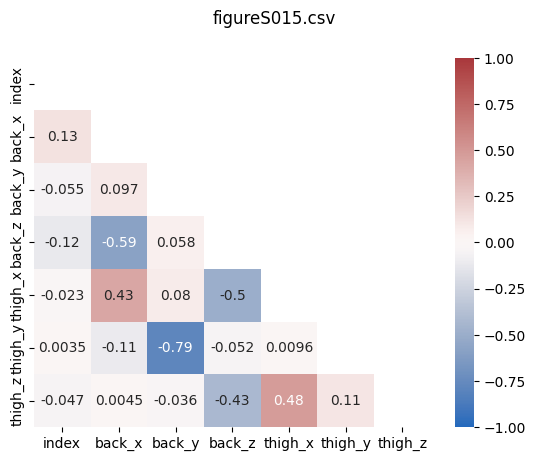

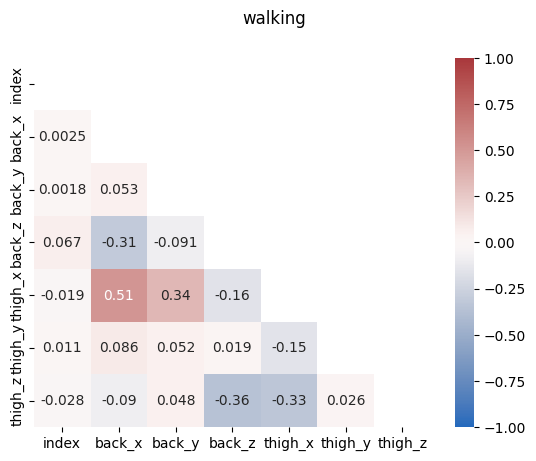

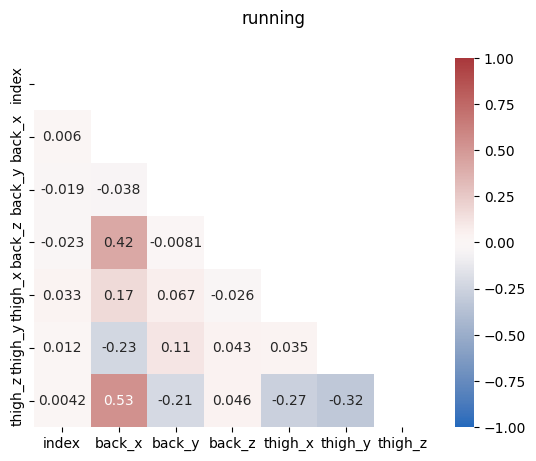

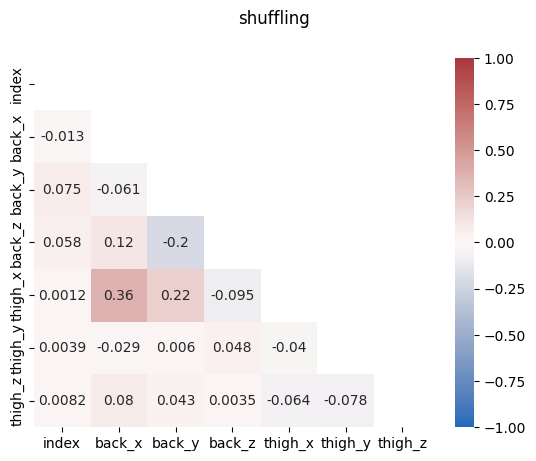

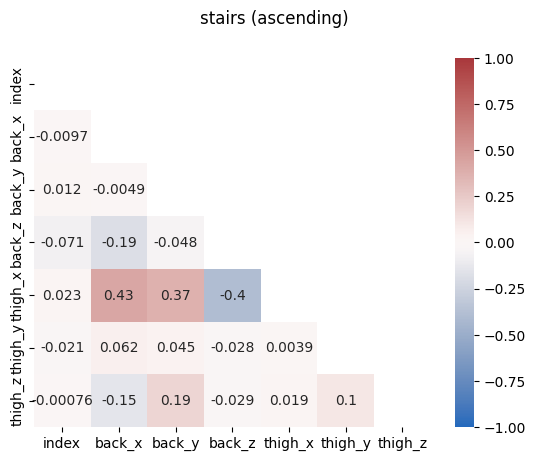

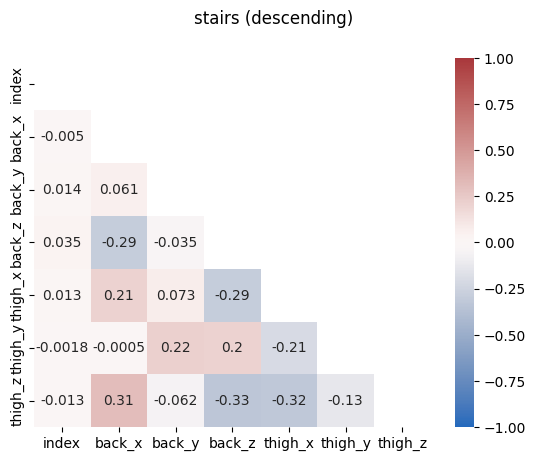

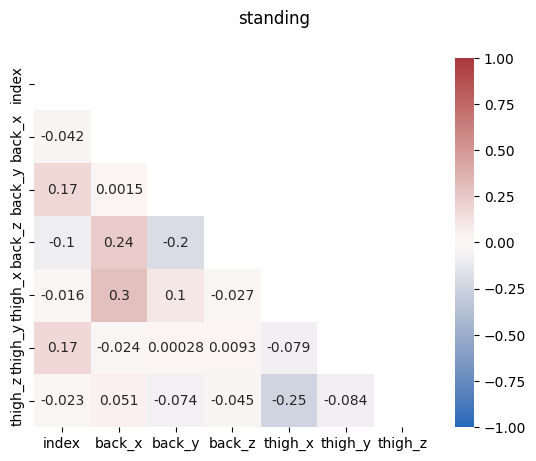

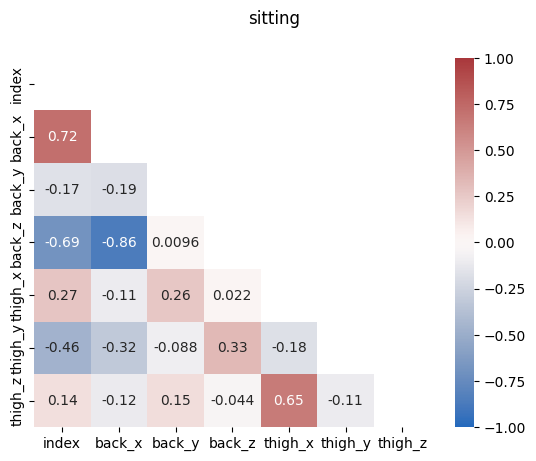

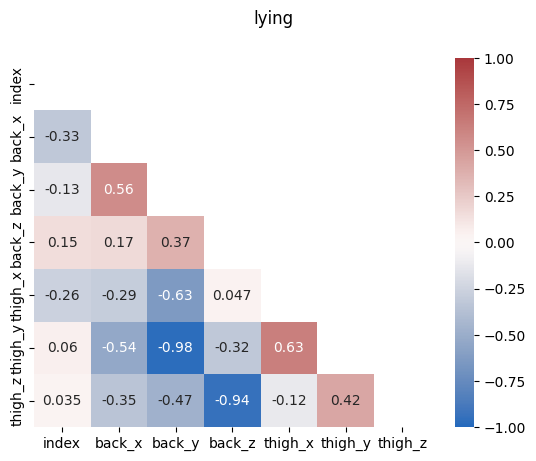

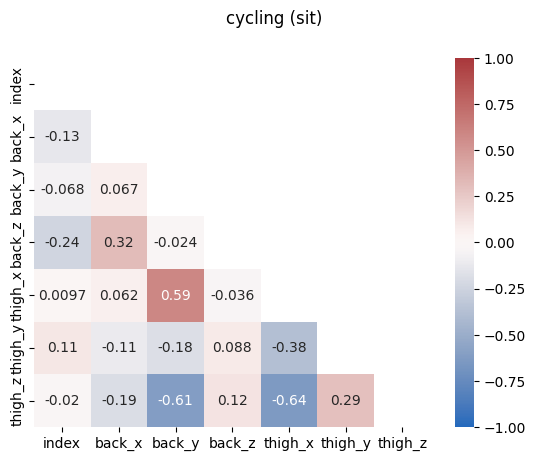

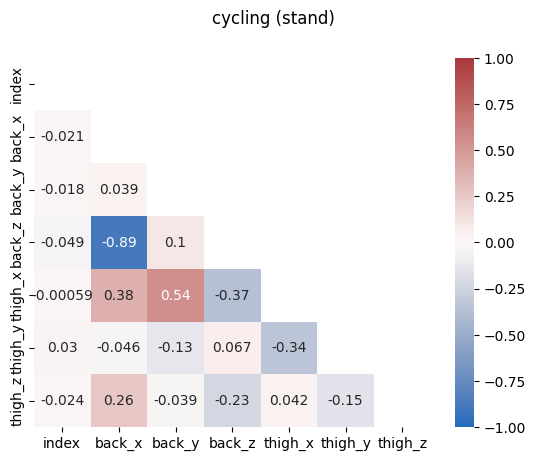

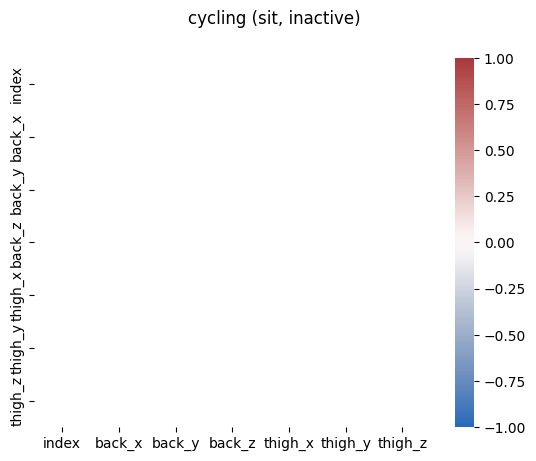

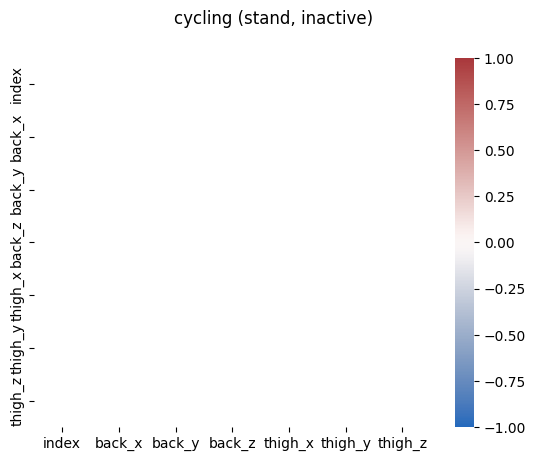

In [5]:

def corr(df, title = 'figure'+random_file):
    plt.figure()
    corr_matrix = df.loc[:, ~df.columns.isin(['label','timestamp'])].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
    ax = sn.heatmap(
        corr_matrix,
        annot = True,
        vmax = 1,
        vmin = -1,
        center = 0,
        cmap = 'vlag',
        mask = mask
    )

    plt.suptitle(title)
    return 
corr(df)
for act in Activities:
    df1 = df.loc[df['label']==act]
    corr(df1, title = Activities[act])


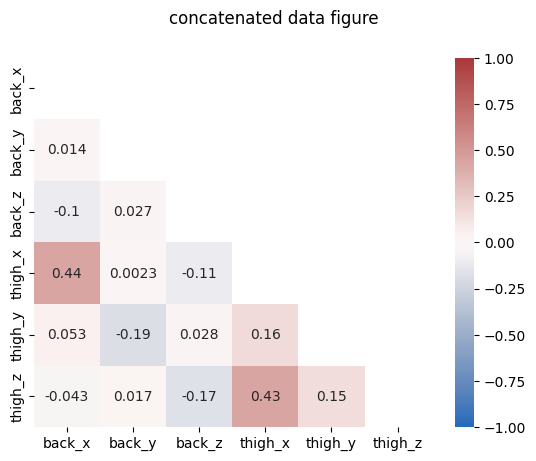

In [6]:
concat = pd.DataFrame()
for root, _, files in os.walk(data_dir):
    for file in files:
        new = pd.read_csv(os.path.join(root, file), index_col = 'timestamp')
        concat = pd.concat([concat, new])
concat.drop(labels = ['index', 'Unnamed: 0'], axis = 'columns', inplace = True)
concat.reset_index(inplace = True)
concat['timestamp'] = pd.to_datetime(concat['timestamp']).dt.time

plt.figure()
corr_concat_matrix = concat.loc[:, ~concat.columns.isin(['label','timestamp'])].corr()
mask = np.triu(np.ones_like(corr_concat_matrix, dtype = bool))
ax1 = sn.heatmap(
    corr_concat_matrix,
    annot = True,
    vmax = 1,
    vmin = -1,
    center = 0,
    cmap = 'vlag',
    mask = mask
)
plt.suptitle('concatenated data figure')

plt.show()


C:\Users\Katerina\AppData\Local\Temp\ipykernel_8648\2904027764.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


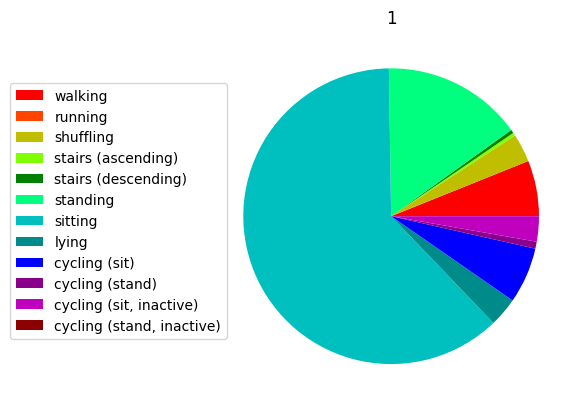

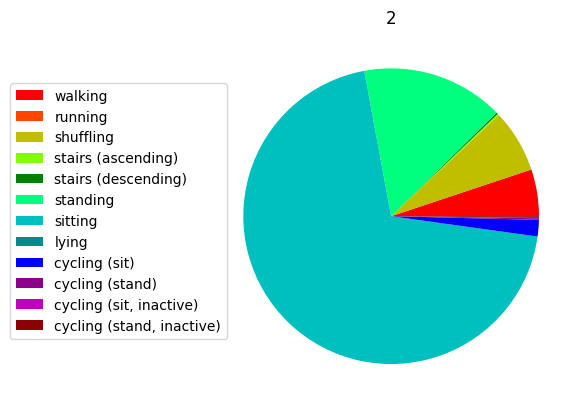

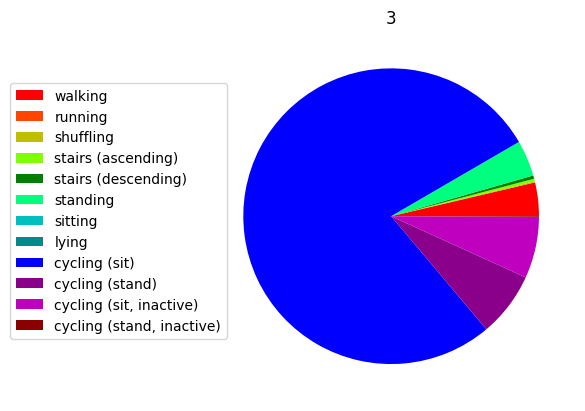

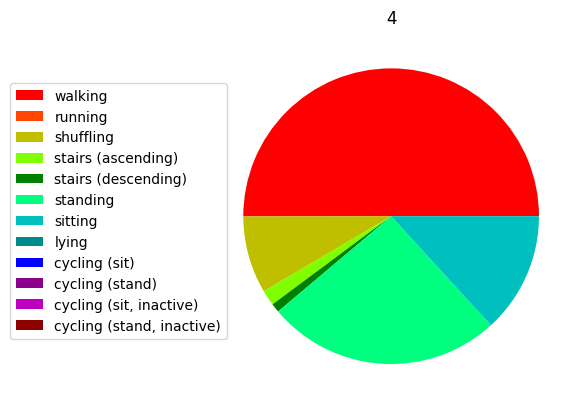

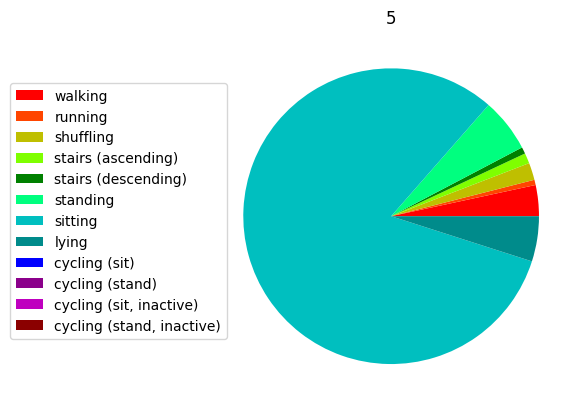

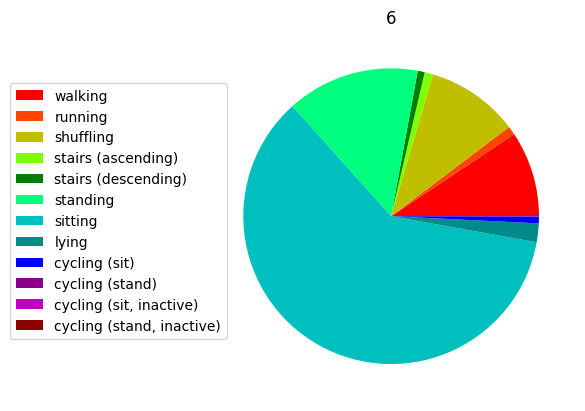

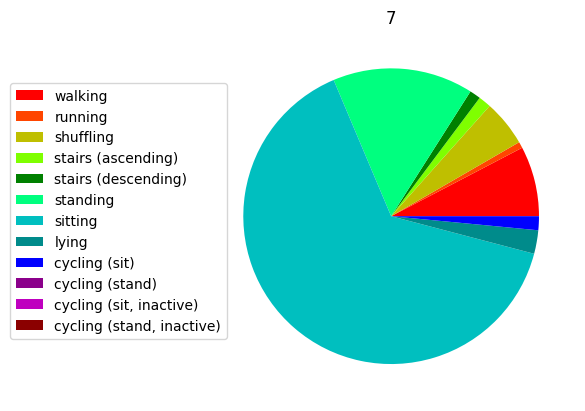

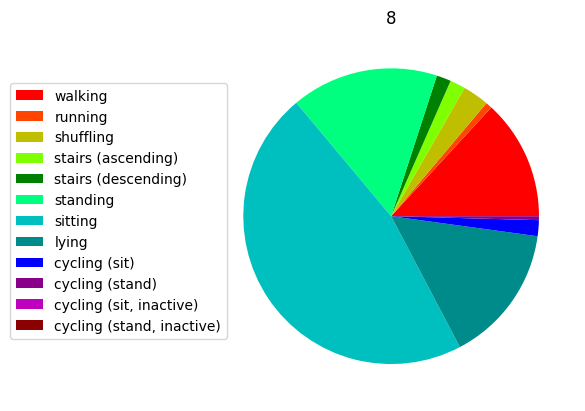

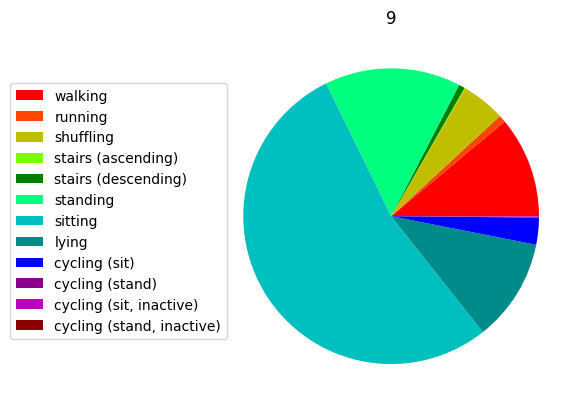

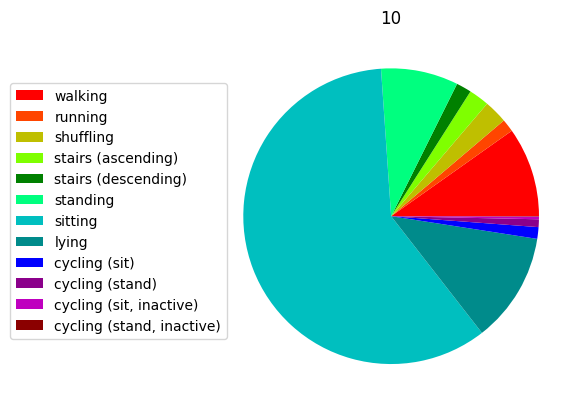

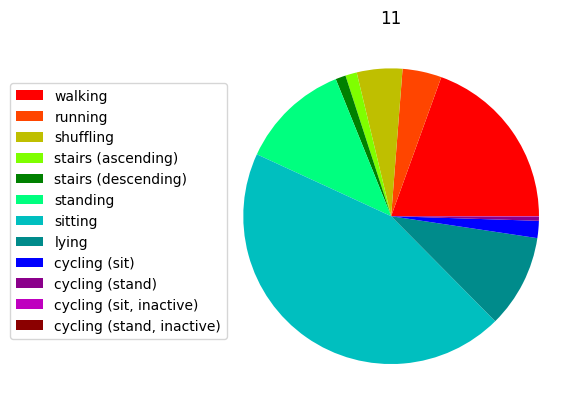

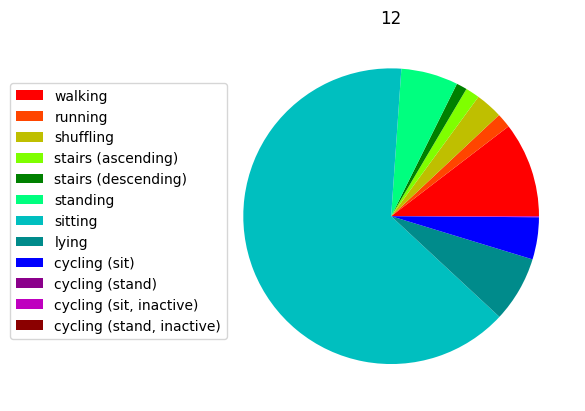

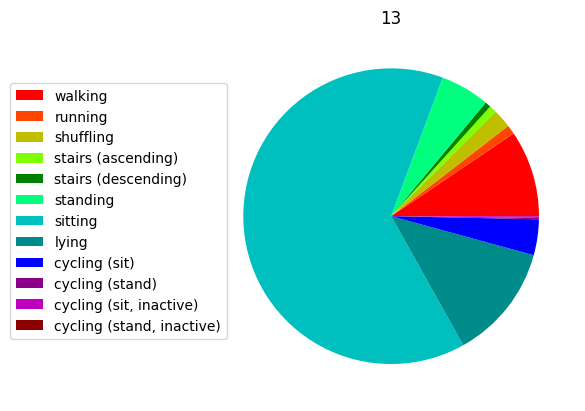

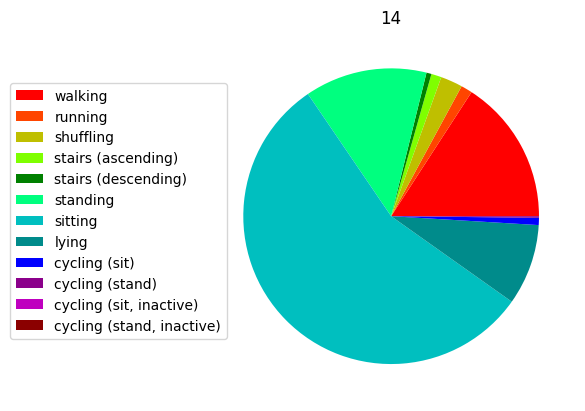

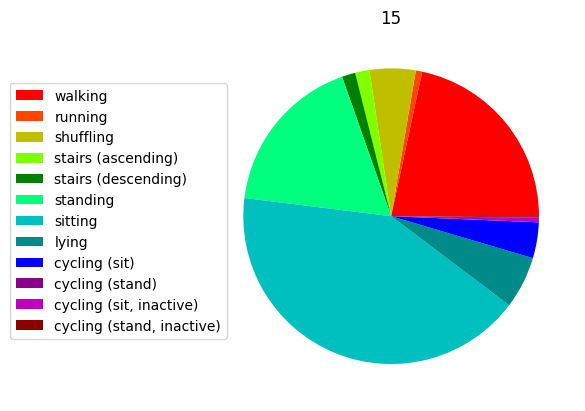

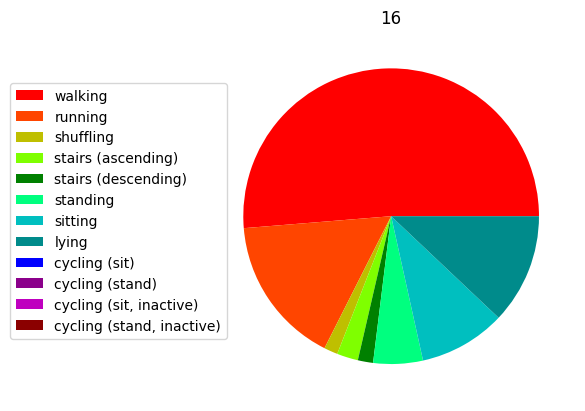

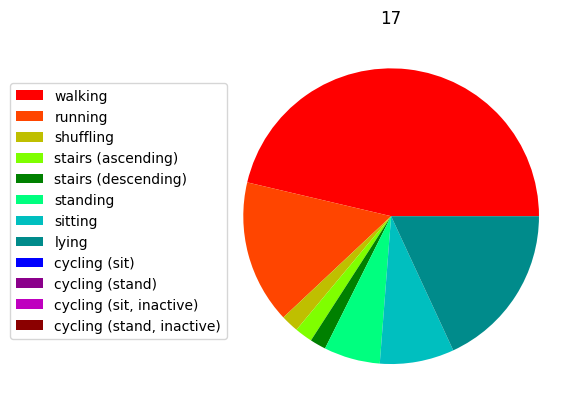

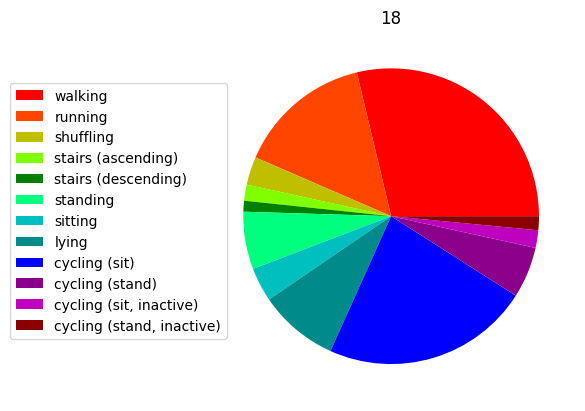

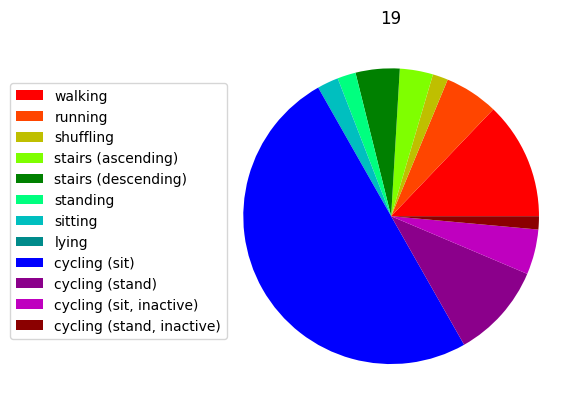

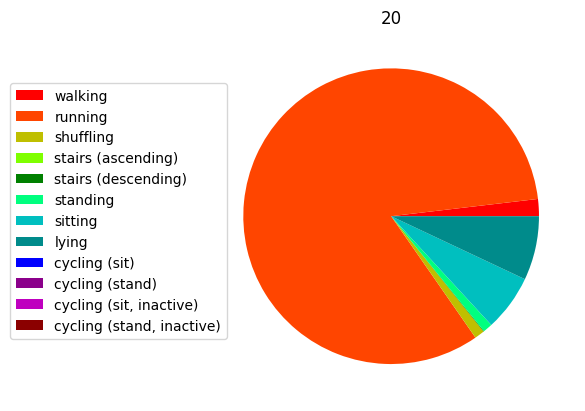

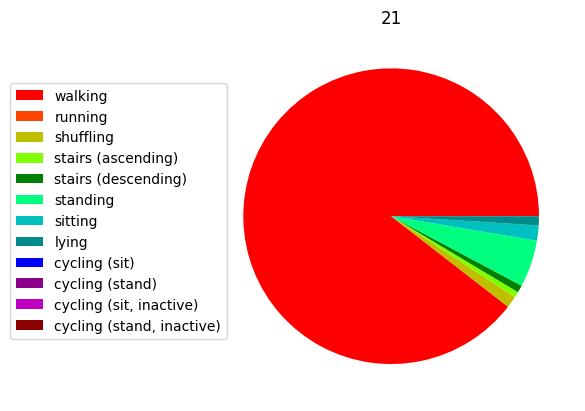

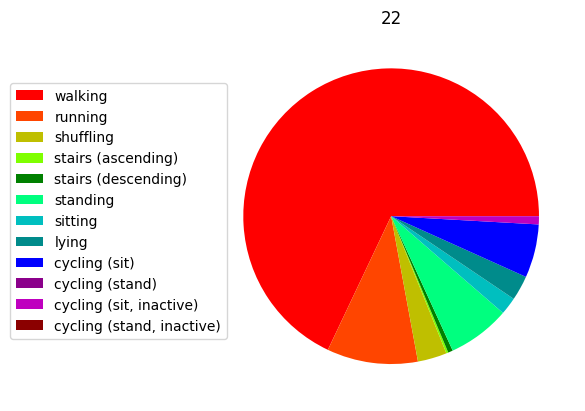

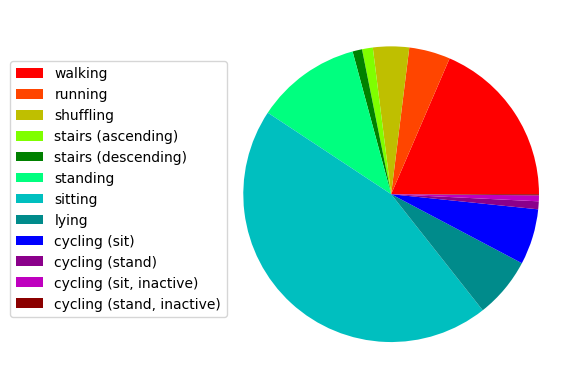

In [7]:
files = glob.glob('harth/*.csv')

dataframes = [pd.read_csv(file) for file in files] #η λίστα με τα αρχεία
for df in dataframes:
    df['timestamp'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.timestamp()) #φτιάχνουμε το timestamp

ctr = 0
for individual_data in dataframes:
    x = np.array(individual_data['timestamp'])
    y = np.array(individual_data['label'])
    labels= []
    sizes = []
    

    for act in Activities:
        x_act = x[np.where(y == act)]
        seconds = len(x_act)/50
        minutes = seconds/60
        labels.append(Activities[act])
        sizes.append(minutes)
    plt.figure()
    plt.title('{}'.format(ctr+1))
    plt.pie(sizes, colors = colors)
    plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
    ctr+=1
    all_sizes = all_sizes + np.array(sizes)

plt.figure()
plt.pie(all_sizes,colors=colors)
plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
plt.show()

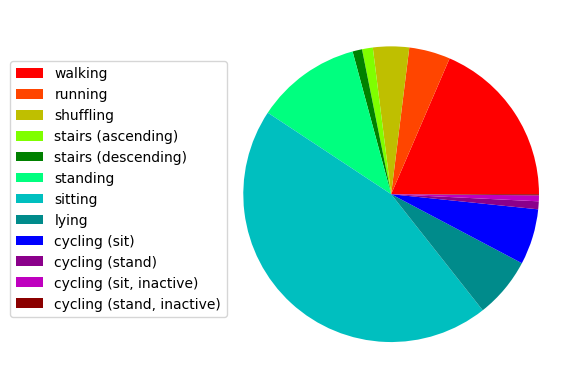

In [8]:
plt.figure()
plt.pie(all_sizes,colors=colors)
plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
plt.show()